This project involves building a regression model to estimate the total number of violent crimes per 100K of population in the United States, on the basis of various parameters. The dataset has been taken from UCI Machine Learning Repository.

Importing the initial libraries needed.

In [1]:
import pandas as pd
import numpy as np                      
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('dark')

Reading the data from the csv file and making a copy to use in the project. This copy is made so that the initial dataset is present for reference, if needed.

In [3]:
data = pd.read_csv('communities.data', header=None)
df = data.copy()

# Data Cleaning and Exploration

Looking at the data.

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


The column description on UCI Machine Learning Repository, from where the dataset has been acquired, is given below.

-- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)

-- county: numeric code for county - not predictive, and many missing values (numeric)

-- community: numeric code for community - not predictive and many missing values (numeric)

-- communityname: community name - not predictive - for information only (string)

-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

-- population: population for community: (numeric - decimal)

-- householdsize: mean people per household (numeric - decimal)

-- racepctblack: percentage of population that is african american (numeric - decimal)

-- racePctWhite: percentage of population that is caucasian (numeric - decimal)

-- racePctAsian: percentage of population that is of asian heritage (numeric - decimal)

-- racePctHisp: percentage of population that is of hispanic heritage (numeric - decimal)

-- agePct12t21: percentage of population that is 12-21 in age (numeric - decimal)

-- agePct12t29: percentage of population that is 12-29 in age (numeric - decimal)

-- agePct16t24: percentage of population that is 16-24 in age (numeric - decimal)

-- agePct65up: percentage of population that is 65 and over in age (numeric - decimal)

-- numbUrban: number of people living in areas classified as urban (numeric - decimal)

-- pctUrban: percentage of people living in areas classified as urban (numeric - decimal)

-- medIncome: median household income (numeric - decimal)

-- pctWWage: percentage of households with wage or salary income in 1989 (numeric - decimal)

-- pctWFarmSelf: percentage of households with farm or self employment income in 1989 (numeric - decimal)

-- pctWInvInc: percentage of households with investment / rent income in 1989 (numeric - decimal)

-- pctWSocSec: percentage of households with social security income in 1989 (numeric - decimal)

-- pctWPubAsst: percentage of households with public assistance income in 1989 (numeric - decimal)

-- pctWRetire: percentage of households with retirement income in 1989 (numeric - decimal)

-- medFamInc: median family income (differs from household income for non-family households) (numeric - decimal)

-- perCapInc: per capita income (numeric - decimal)

-- whitePerCap: per capita income for caucasians (numeric - decimal)

-- blackPerCap: per capita income for african americans (numeric - decimal)

-- indianPerCap: per capita income for native americans (numeric - decimal)

-- AsianPerCap: per capita income for people with asian heritage (numeric - decimal)

-- OtherPerCap: per capita income for people with 'other' heritage (numeric - decimal)

-- HispPerCap: per capita income for people with hispanic heritage (numeric - decimal)

-- NumUnderPov: number of people under the poverty level (numeric - decimal)

-- PctPopUnderPov: percentage of people under the poverty level (numeric - decimal)

-- PctLess9thGrade: percentage of people 25 and over with less than a 9th grade education (numeric - decimal)

-- PctNotHSGrad: percentage of people 25 and over that are not high school graduates (numeric - decimal)

-- PctBSorMore: percentage of people 25 and over with a bachelors degree or higher education (numeric - decimal)

-- PctUnemployed: percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal)

-- PctEmploy: percentage of people 16 and over who are employed (numeric - decimal)

-- PctEmplManu: percentage of people 16 and over who are employed in manufacturing (numeric - decimal)

-- PctEmplProfServ: percentage of people 16 and over who are employed in professional services (numeric - decimal)

-- PctOccupManu: percentage of people 16 and over who are employed in manufacturing (numeric - decimal)

-- PctOccupMgmtProf: percentage of people 16 and over who are employed in management or professional occupations (numeric - decimal)

-- MalePctDivorce: percentage of males who are divorced (numeric - decimal)

-- MalePctNevMarr: percentage of males who have never married (numeric - decimal)

-- FemalePctDiv: percentage of females who are divorced (numeric - decimal)

-- TotalPctDiv: percentage of population who are divorced (numeric - decimal)

-- PersPerFam: mean number of people per family (numeric - decimal)

-- PctFam2Par: percentage of families (with kids) that are headed by two parents (numeric - decimal)

-- PctKids2Par: percentage of kids in family housing with two parents (numeric - decimal)

-- PctYoungKids2Par: percent of kids 4 and under in two parent households (numeric - decimal)

-- PctTeen2Par: percent of kids age 12-17 in two parent households (numeric - decimal)

-- PctWorkMomYoungKids: percentage of moms of kids 6 and under in labor force (numeric - decimal)

-- PctWorkMom: percentage of moms of kids under 18 in labor force (numeric - decimal)

-- NumIlleg: number of kids born to never married (numeric - decimal)

-- PctIlleg: percentage of kids born to never married (numeric - decimal)

-- NumImmig: total number of people known to be foreign born (numeric - decimal)

-- PctImmigRecent: percentage of _immigrants_ who immigated within last 3 years (numeric - decimal)

-- PctImmigRec5: percentage of _immigrants_ who immigated within last 5 years (numeric - decimal)

-- PctImmigRec8: percentage of _immigrants_ who immigated within last 8 years (numeric - decimal)

-- PctImmigRec10: percentage of _immigrants_ who immigated within last 10 years (numeric - decimal)

-- PctRecentImmig: percent of _population_ who have immigrated within the last 3 years (numeric - decimal)

-- PctRecImmig5: percent of _population_ who have immigrated within the last 5 years (numeric - decimal)

-- PctRecImmig8: percent of _population_ who have immigrated within the last 8 years (numeric - decimal)

-- PctRecImmig10: percent of _population_ who have immigrated within the last 10 years (numeric - decimal)

-- PctSpeakEnglOnly: percent of people who speak only English (numeric - decimal)

-- PctNotSpeakEnglWell: percent of people who do not speak English well (numeric - decimal)

-- PctLargHouseFam: percent of family households that are large (6 or more) (numeric - decimal)

-- PctLargHouseOccup: percent of all occupied households that are large (6 or more people) (numeric - decimal)

-- PersPerOccupHous: mean persons per household (numeric - decimal)

-- PersPerOwnOccHous: mean persons per owner occupied household (numeric - decimal)

-- PersPerRentOccHous: mean persons per rental household (numeric - decimal)

-- PctPersOwnOccup: percent of people in owner occupied households (numeric - decimal)

-- PctPersDenseHous: percent of persons in dense housing (more than 1 person per room) (numeric - decimal)

-- PctHousLess3BR: percent of housing units with less than 3 bedrooms (numeric - decimal)

-- MedNumBR: median number of bedrooms (numeric - decimal)

-- HousVacant: number of vacant households (numeric - decimal)

-- PctHousOccup: percent of housing occupied (numeric - decimal)

-- PctHousOwnOcc: percent of households owner occupied (numeric - decimal)

-- PctVacantBoarded: percent of vacant housing that is boarded up (numeric - decimal)

-- PctVacMore6Mos: percent of vacant housing that has been vacant more than 6 months (numeric - decimal)

-- MedYrHousBuilt: median year housing units built (numeric - decimal)

-- PctHousNoPhone: percent of occupied housing units without phone (in 1990, this was rare!) (numeric - decimal)

-- PctWOFullPlumb: percent of housing without complete plumbing facilities (numeric - decimal)

-- OwnOccLowQuart: owner occupied housing - lower quartile value (numeric - decimal)

-- OwnOccMedVal: owner occupied housing - median value (numeric - decimal)

-- OwnOccHiQuart: owner occupied housing - upper quartile value (numeric - decimal)

-- RentLowQ: rental housing - lower quartile rent (numeric - decimal)

-- RentMedian: rental housing - median rent (Census variable H32B from file STF1A) (numeric - decimal)

-- RentHighQ: rental housing - upper quartile rent (numeric - decimal)

-- MedRent: median gross rent (Census variable H43A from file STF3A - includes utilities) (numeric - decimal)

-- MedRentPctHousInc: median gross rent as a percentage of household income (numeric - decimal)

-- MedOwnCostPctInc: median owners cost as a percentage of household income - for owners with a mortgage (numeric - decimal)

-- MedOwnCostPctIncNoMtg: median owners cost as a percentage of household income - for owners without a mortgage (numeric - decimal)

-- NumInShelters: number of people in homeless shelters (numeric - decimal)

-- NumStreet: number of homeless people counted in the street (numeric - decimal)

-- PctForeignBorn: percent of people foreign born (numeric - decimal)

-- PctBornSameState: percent of people born in the same state as currently living (numeric - decimal)

-- PctSameHouse85: percent of people living in the same house as in 1985 (5 years before) (numeric - decimal)

-- PctSameCity85: percent of people living in the same city as in 1985 (5 years before) (numeric - decimal)

-- PctSameState85: percent of people living in the same state as in 1985 (5 years before) (numeric - decimal)

-- LemasSwornFT: number of sworn full time police officers (numeric - decimal)

-- LemasSwFTPerPop: sworn full time police officers per 100K population (numeric - decimal)

-- LemasSwFTFieldOps: number of sworn full time police officers in field operations (on the street as opposed to administrative etc) (numeric - decimal)

-- LemasSwFTFieldPerPop: sworn full time police officers in field operations (on the street as opposed to administrative etc) per 100K population (numeric - decimal)

-- LemasTotalReq: total requests for police (numeric - decimal)

-- LemasTotReqPerPop: total requests for police per 100K popuation (numeric - decimal)

-- PolicReqPerOffic: total requests for police per police officer (numeric - decimal)

-- PolicPerPop: police officers per 100K population (numeric - decimal)

-- RacialMatchCommPol: a measure of the racial match between the community and the police force. High values indicate proportions in community and police force are similar (numeric - decimal)

-- PctPolicWhite: percent of police that are caucasian (numeric - decimal)

-- PctPolicBlack: percent of police that are african american (numeric - decimal)

-- PctPolicHisp: percent of police that are hispanic (numeric - decimal)

-- PctPolicAsian: percent of police that are asian (numeric - decimal)

-- PctPolicMinor: percent of police that are minority of any kind (numeric - decimal)

-- OfficAssgnDrugUnits: number of officers assigned to special drug units (numeric - decimal)

-- NumKindsDrugsSeiz: number of different kinds of drugs seized (numeric - decimal)

-- PolicAveOTWorked: police average overtime worked (numeric - decimal)

-- LandArea: land area in square miles (numeric - decimal)

-- PopDens: population density in persons per square mile (numeric - decimal)

-- PctUsePubTrans: percent of people using public transit for commuting (numeric - decimal)

-- PolicCars: number of police cars (numeric - decimal)

-- PolicOperBudg: police operating budget (numeric - decimal)

-- LemasPctPolicOnPatr: percent of sworn full time police officers on patrol (numeric - decimal)

-- LemasGangUnitDeploy: gang unit deployed (numeric - decimal - but really ordinal - 0 means NO, 1 means YES, 0.5 means Part Time)

-- LemasPctOfficDrugUn: percent of officers assigned to drug units (numeric - decimal)

-- PolicBudgPerPop: police operating budget per population (numeric - decimal)

-- ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)

Setting the column names.

In [5]:
column_names = ['communitynum',
'state',
'county',
'community',
'fold',
'population',
'householdsize',
'racepctblack',
'racePctWhite',
'racePctAsian',
'racePctHisp',
'agePct12t21',
'agePct12t29',
'agePct16t24',
'agePct65up',
'numbUrban',
'pctUrban',
'medIncome',
'pctWWage',
'pctWFarmSelf',
'pctWInvInc',
'pctWSocSec',
'pctWPubAsst',
'pctWRetire',
'medFamInc',
'perCapInc',
'whitePerCap',
'blackPerCap',
'indianPerCap',
'AsianPerCap',
'OtherPerCap',
'HispPerCap',
'NumUnderPov',
'PctPopUnderPov',
'PctLess9thGrade',
'PctNotHSGrad',
'PctBSorMore',
'PctUnemployed',
'PctEmploy',
'PctEmplManu',
'PctEmplProfServ',
'PctOccupManu',
'PctOccupMgmtProf',
'MalePctDivorce',
'MalePctNevMarr',
'FemalePctDiv',
'TotalPctDiv',
'PersPerFam',
'PctFam2Par',
'PctKids2Par',
'PctYoungKids2Par',
'PctTeen2Par',
'PctWorkMomYoungKids',
'PctWorkMom',
'NumIlleg',
'PctIlleg',
'NumImmig',
'PctImmigRecent',
'PctImmigRec5',
'PctImmigRec8',
'PctImmigRec10',
'PctRecentImmig',
'PctRecImmig5',
'PctRecImmig8',
'PctRecImmig10',
'PctSpeakEnglOnly',
'PctNotSpeakEnglWell',
'PctLargHouseFam',
'PctLargHouseOccup',
'PersPerOccupHous',
'PersPerOwnOccHous',
'PersPerRentOccHous',
'PctPersOwnOccup',
'PctPersDenseHous',
'PctHousLess3BR',
'MedNumBR',
'HousVacant',
'PctHousOccup',
'PctHousOwnOcc',
'PctVacantBoarded',
'PctVacMore6Mos',
'MedYrHousBuilt',
'PctHousNoPhone',
'PctWOFullPlumb',
'OwnOccLowQuart',
'OwnOccMedVal',
'OwnOccHiQuart',
'RentLowQ',
'RentMedian',
'RentHighQ',
'MedRent',
'MedRentPctHousInc',
'MedOwnCostPctInc',
'MedOwnCostPctIncNoMtg',
'NumInShelters',
'NumStreet',
'PctForeignBorn',
'PctBornSameState',
'PctSameHouse85',
'PctSameCity85',
'PctSameState85',
'LemasSwornFT',
'LemasSwFTPerPop',
'LemasSwFTFieldOps',
'LemasSwFTFieldPerPop',
'LemasTotalReq',
'LemasTotReqPerPop',
'PolicReqPerOffic',
'PolicPerPop',
'RacialMatchCommPol',
'PctPolicWhite',
'PctPolicBlack',
'PctPolicHisp',
'PctPolicAsian',
'PctPolicMinor',
'OfficAssgnDrugUnits',
'NumKindsDrugsSeiz',
'PolicAveOTWorked',
'LandArea',
'PopDens',
'PctUsePubTrans',
'PolicCars',
'PolicOperBudg',
'LemasPctPolicOnPatr',
'LemasGangUnitDeploy',
'LemasPctOfficDrugUn',
'PolicBudgPerPop',
'ViolentCrimesPerPop']

df.columns = column_names


In [6]:
df

,communitynum,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, communitynum to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


Handling missing values

In [8]:
df = df.replace('?', np.nan)

In [9]:
pd.set_option('max_rows', None)
df.isnull().sum()

communitynum                0
state                    1174
county                   1177
community                   0
fold                        0
population                  0
householdsize               0
racepctblack                0
racePctWhite                0
racePctAsian                0
racePctHisp                 0
agePct12t21                 0
agePct12t29                 0
agePct16t24                 0
agePct65up                  0
numbUrban                   0
pctUrban                    0
medIncome                   0
pctWWage                    0
pctWFarmSelf                0
pctWInvInc                  0
pctWSocSec                  0
pctWPubAsst                 0
pctWRetire                  0
medFamInc                   0
perCapInc                   0
whitePerCap                 0
blackPerCap                 0
indianPerCap                0
AsianPerCap                 0
OtherPerCap                 1
HispPerCap                  0
NumUnderPov                 0
PctPopUnde

Since the following columns contain mostly null values, they are dropped.

In [10]:
df = df.drop(['state', 'county', 'LemasSwornFT' , 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 
              'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 
              'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 
              'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 
              'PolicBudgPerPop'], axis=1)

In [11]:
df.head()

,communitynum,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [12]:
df.dropna(inplace=True)

'numbUrban' and 'pctUrban' basically tell the same information so only one of these is kept.

In [13]:
df.drop('numbUrban', axis=1, inplace=True)

Based on the same condition, dropping the following columns.

In [14]:
df.drop(['NumIlleg', 'NumImmig'], axis=1, inplace=True)

Dropping LemasPctOfficeDrugUn since the column it is based on mostly contained null values so this column mostly contains 0s.

In [15]:
df.drop(['LemasPctOfficDrugUn'], axis=1, inplace=True)

Dropping fold because it is not required.

In [16]:
df.drop(['fold'], axis=1, inplace=True)

Checking a few statisitics.

In [17]:
df.shape

(1993, 99)

In [18]:
df.describe

<bound method NDFrame.describe of       communitynum                     community  population  householdsize  \
0                8                  Lakewoodcity        0.19           0.33   
1               53                   Tukwilacity        0.00           0.16   
2               24                  Aberdeentown        0.00           0.42   
3               34           Willingborotownship        0.04           0.77   
4               42             Bethlehemtownship        0.01           0.55   
5                6             SouthPasadenacity        0.02           0.28   
6               44                   Lincolntown        0.01           0.39   
7                6                     Selmacity        0.01           0.74   
8               21                 Hendersoncity        0.03           0.34   
9               29                   Claytoncity        0.01           0.40   
10               6                  DalyCitycity        0.13           0.71   
11              36

Checking whether the target column is normally distributed or not, because regression works well with normal distribution.

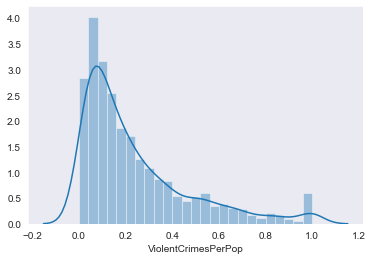

In [19]:
sns.distplot(df.loc[:,'ViolentCrimesPerPop'], norm_hist=True)

Here, it is observed that normal distribution is not present. Furthur, the data seems to be right skewed.

In [20]:
print("Mean: " + str(df['ViolentCrimesPerPop'].mean()))
print("Variance: " + str(df['ViolentCrimesPerPop'].var()))
print("Skewness: " + str(df['ViolentCrimesPerPop'].skew()))
print("Kurtosis: " + str(df['ViolentCrimesPerPop'].kurt()))

Mean: 0.23798294029101855
Variance: 0.054309182439743926
Skewness: 1.5221669932528024
Kurtosis: 1.8307464810008738


Checking for outliers.

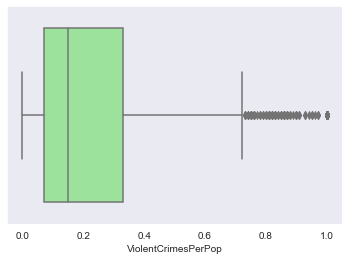

In [21]:
sns.boxplot(df.loc[:, 'ViolentCrimesPerPop'], color='lightgreen')

A large number of outliers are observed.

The distribution of all other variables can also be plotted.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018094AF4688>,
      dtype=object)

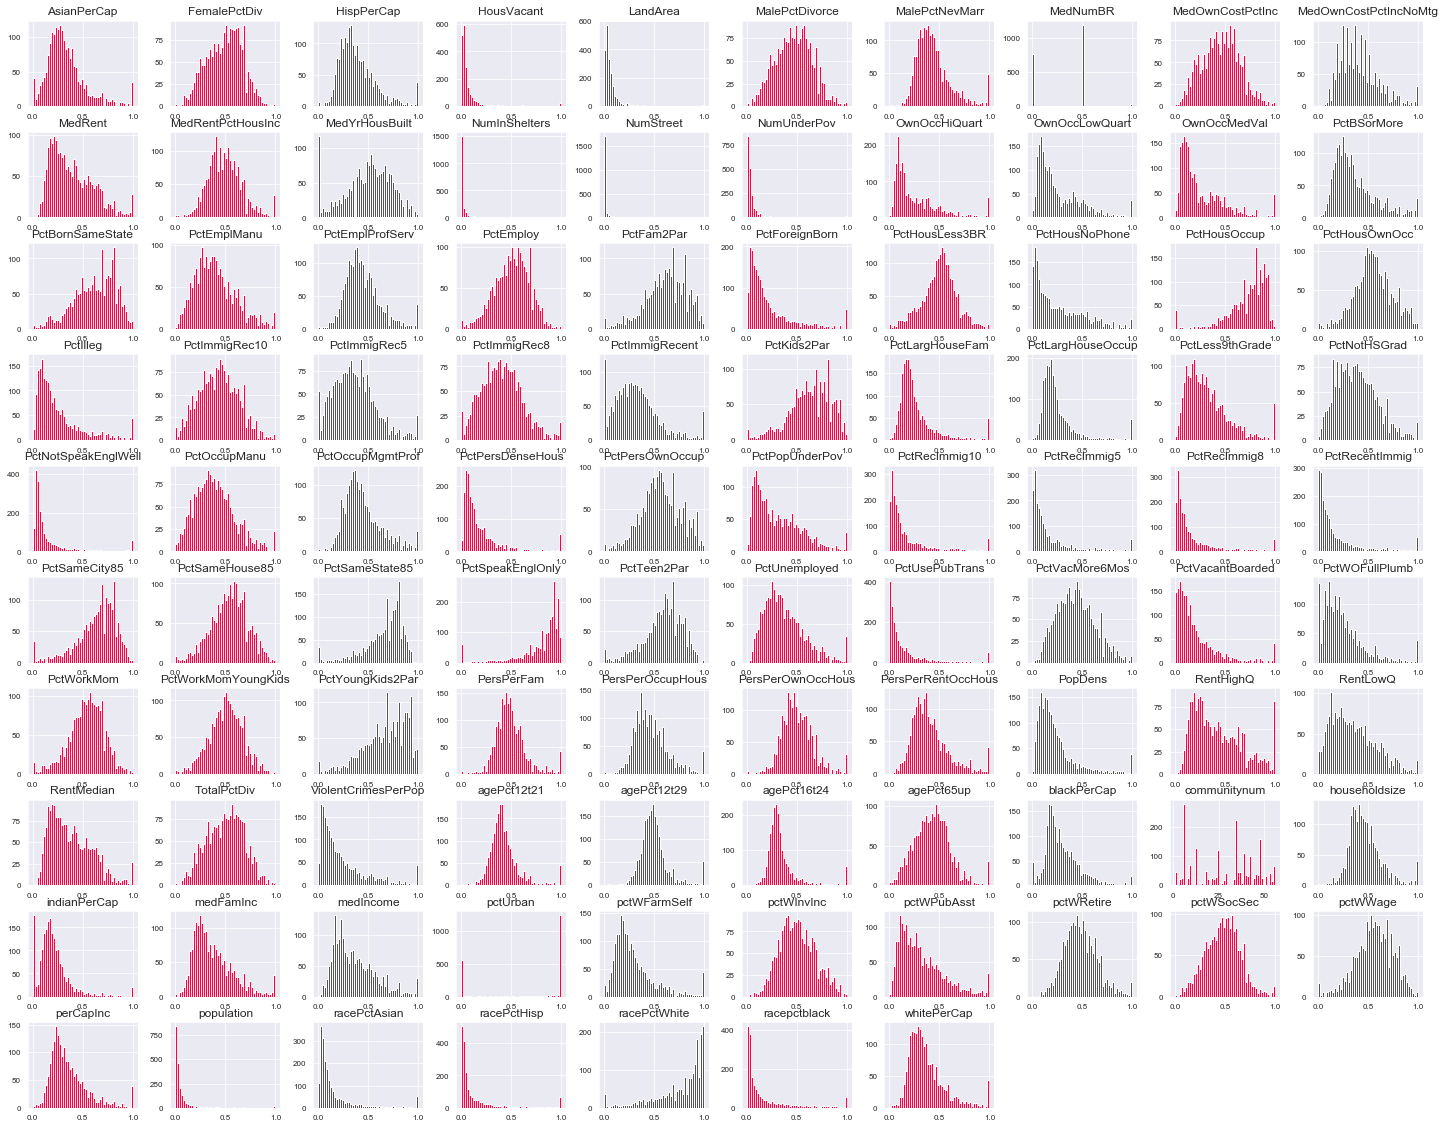

In [22]:
df.hist(figsize=(25, 20), bins=50, xlabelsize=8, ylabelsize=8, color='crimson')

Checking the correlation of various variables with the target variable.

In [23]:
corr = df.corr()
corr.sort_values(["ViolentCrimesPerPop"], ascending = False, inplace = True)
print(corr.ViolentCrimesPerPop)

ViolentCrimesPerPop      1.000000
PctIlleg                 0.739266
racepctblack             0.632904
pctWPubAsst              0.575327
FemalePctDiv             0.556125
TotalPctDiv              0.552892
MalePctDivorce           0.525522
PctPopUnderPov           0.522670
PctUnemployed            0.505042
PctHousNoPhone           0.488386
PctNotHSGrad             0.483452
PctVacantBoarded         0.482853
PctHousLess3BR           0.474491
PctPersDenseHous         0.452900
NumUnderPov              0.447581
HousVacant               0.421396
PctLess9thGrade          0.411228
PctLargHouseFam          0.383481
NumInShelters            0.375757
population               0.367160
PctWOFullPlumb           0.364682
NumStreet                0.340277
MedRentPctHousInc        0.325091
MalePctNevMarr           0.304584
PctNotSpeakEnglWell      0.300036
PctOccupManu             0.295580
PctLargHouseOccup        0.294803
racePctHisp              0.293065
PctImmigRec10            0.291703
PopDens       

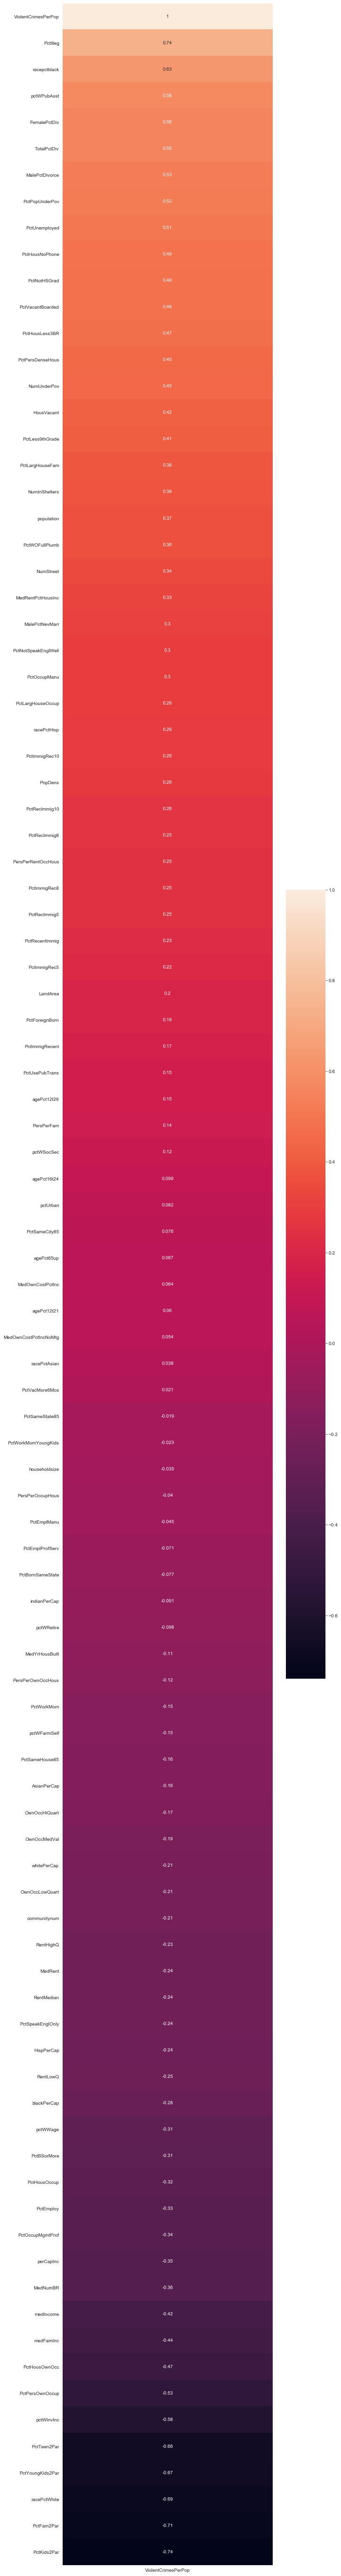

In [24]:
fig, ax = plt.subplots(figsize=(10,100))
dff = pd.DataFrame(corr.ViolentCrimesPerPop, index=corr.index)
sns.heatmap(dff, annot=True, ax=ax)

Exploring a few more visualisations.

Taking the top 2 most correlated variables and plotting a scatter plot with the target variable.

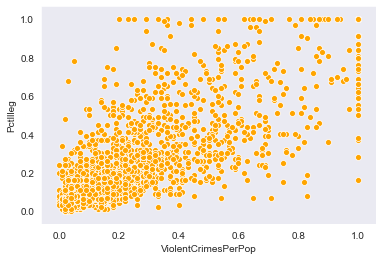

In [25]:
sns.scatterplot(df['ViolentCrimesPerPop'], df['PctIlleg'], color='orange')

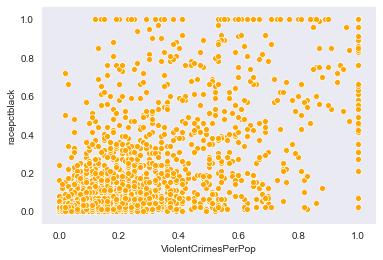

In [26]:
sns.scatterplot(df['ViolentCrimesPerPop'], df['racepctblack'], color='orange')

The above two plots show positive correlation. A large number of outliers are also observed.

Taking the bottom 2 least correlated variables and plotting a scatter plot with the target variable.

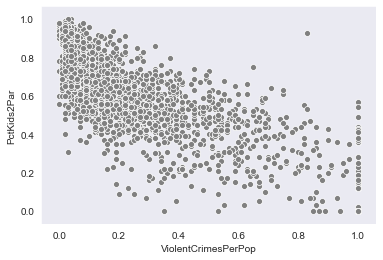

In [27]:
sns.scatterplot(df['ViolentCrimesPerPop'], df['PctKids2Par'], color='grey')

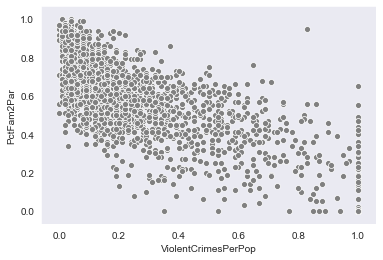

In [28]:
sns.scatterplot(df['ViolentCrimesPerPop'], df['PctFam2Par'], color='grey')

Negative correlation is observed with a number of outliers

The same can be done for all other variables as well, but I have not done it here.

Now, logarithm transform is taken of the target variable to reduce the amount of skewness.

In [29]:
df["ViolentCrimesPerPop"] = np.log1p(df["ViolentCrimesPerPop"])

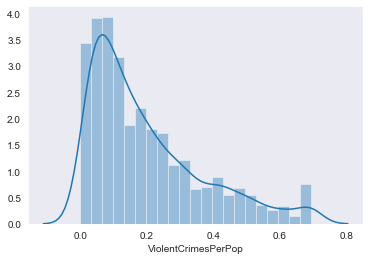

In [30]:
sns.distplot(df.loc[:,'ViolentCrimesPerPop'], norm_hist=True)

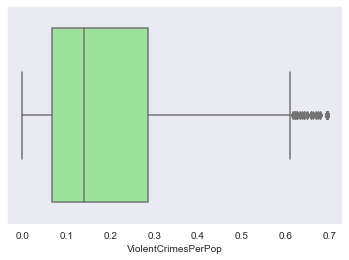

In [31]:
sns.boxplot(df.loc[:, 'ViolentCrimesPerPop'], color='lightgreen')

As it can be seen, the target variable has become slightly more normal and the amount of outliers have also been reduced.

Now, detecting and handling outliers in the entire dataset.

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

communitynum             30.00000
population                0.04000
householdsize             0.19000
racepctblack              0.21000
racePctWhite              0.31000
racePctAsian              0.13000
racePctHisp               0.15000
agePct12t21               0.13000
agePct12t29               0.13000
agePct16t24               0.11000
agePct65up                0.23000
pctUrban                  1.00000
medIncome                 0.29000
pctWWage                  0.25000
pctWFarmSelf              0.21000
pctWInvInc                0.25000
pctWSocSec                0.23000
pctWPubAsst               0.30000
pctWRetire                0.22000
medFamInc                 0.25000
perCapInc                 0.21000
whitePerCap               0.20000
blackPerCap               0.20000
indianPerCap              0.14000
AsianPerCap               0.21000
HispPerCap                0.22000
NumUnderPov               0.04000
PctPopUnderPov            0.34000
PctLess9thGrade           0.26000
PctNotHSGrad  

In [33]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

      AsianPerCap  FemalePctDiv  HispPerCap  HousVacant  LandArea  \
0           False         False       False       False     False   
1           False         False       False       False     False   
2           False         False       False       False     False   
3           False         False       False       False     False   
4           False         False       False       False     False   
5           False         False       False       False     False   
6           False         False       False       False     False   
7           False         False       False       False     False   
8           False         False       False       False     False   
9           False         False       False       False     False   
10          False         False       False       False     False   
11          False         False       False       False     False   
12          False         False       False       False     False   
13          False         False   

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [ ]:
df = df[(df > (Q1 - 1.5 * IQR)) | (df < (Q3 + 1.5 * IQR))]

In [34]:
df.isnull().sum()

communitynum             0
community                0
population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              0
HispPerCap               0
NumUnderPov              0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
PctBSorMore              0
PctUnemployed            0
PctEmploy                0
PctEmplManu              0
PctEmplProfServ          0
P

Visualizing NumStreet which contains a huge number of outliers.

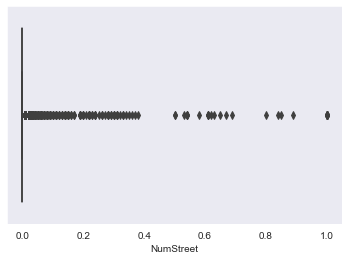

In [35]:
sns.boxplot(df.loc[:, 'NumStreet'])

Dropping 'community', 'OtherPerCap' and 'NumStreet' because after removing the outliers, they mostly contain null values.

In [36]:
df = df.drop(['community', 'OtherPerCap', 'NumStreet'], axis=1)

In [37]:
df.shape

(1993, 96)

# Machine Learning

Splitting the data into training and test sets.

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop('ViolentCrimesPerPop', axis=1)
y = df['ViolentCrimesPerPop']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Linear Regression.

In [41]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

print('linear regression model coeff (w):', linreg.coef_)
print('linear regression model intercept (b):', linreg.intercept_)

linear regression model coeff (w): [-0.00083689  0.03454543 -0.03638716  0.1419476  -0.0137816   0.01076702
  0.06258206  0.12687182 -0.18744933 -0.11063872 -0.03439659  0.03540656
 -0.31377573 -0.12984296  0.03930644 -0.13496863  0.10985643 -0.01332602
 -0.0683316   0.2307744   0.04101339 -0.12532636 -0.01028581 -0.02168579
  0.0025383   0.03424178 -0.11354269 -0.10651945 -0.05017296  0.0034614
  0.04041327  0.01779646  0.15796268 -0.05032482 -0.04325482  0.03947899
  0.09138461  0.38602835  0.13250798  0.12761277 -0.4398171  -0.1174378
  0.03782897 -0.24372976 -0.01679628  0.01566437  0.04041526 -0.13007807
  0.09821506  0.07367515 -0.06141533 -0.0093387   0.0276145  -0.09269855
  0.05082994  0.03646923 -0.00828304 -0.01929407 -0.09885039 -0.12056016
  0.02126174  0.59020745 -0.15604319 -0.19023274 -0.38878654  0.09222601
  0.04829365  0.00383567  0.13186519 -0.03082003  0.24872109  0.04431857
 -0.04585285 -0.01304291  0.00250739 -0.01891682 -0.29645554  0.34972474
 -0.13956335 -0.15

Evaluating the model.

In [42]:
from sklearn.metrics import mean_squared_error

y_pred = linreg.predict(X_train)
rmse = mean_squared_error(y_train, y_pred)
print(rmse)

y_predicted = linreg.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
print(rmse)

0.008081295783244928
0.009747291709492685


In [43]:
from sklearn.metrics import r2_score

print('Training r2 score:', r2_score(y_train, y_pred))
print('Testing r2 score:', r2_score(y_test, y_predicted))

Training r2 score: 0.7157856525034703
Testing r2 score: 0.6770683735169438


Ridge regression.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

linridge = Ridge(random_state=0)

grid_values = {'alpha': [0, 1, 10, 20, 50, 100, 1000]}
grid_linridge = GridSearchCV(linridge, param_grid = grid_values, cv=5, iid=False)
grid_linridge.fit(X_train, y_train)

print('Grid best parameter: ', grid_linridge.best_params_)

Grid best parameter:  {'alpha': 1}


In [45]:
linridge = Ridge(alpha=1.0).fit(X_train, y_train)

print('ridge regression model coeff (w):', linridge.coef_)
print('ridge regression model intercept (b):', linridge.intercept_)

ridge regression model coeff (w): [-0.00093434 -0.00088251  0.01222562  0.12689821 -0.03438464  0.00049063
  0.04602235  0.04840915 -0.12058926 -0.03596279  0.01081162  0.03620531
 -0.03060807 -0.08215974  0.03305025 -0.1094216   0.04733933 -0.00806176
 -0.06614629  0.02011083 -0.00437152 -0.05503119 -0.01094869 -0.01842388
  0.00709043  0.02971571 -0.04517346 -0.08430208 -0.04365211  0.00707422
  0.02535801 -0.00263798  0.08657063 -0.04120894 -0.04082828  0.03565799
  0.04379872  0.11801981  0.06557982 -0.05831407 -0.01082936  0.00983222
 -0.0381523  -0.1115833  -0.03371132  0.00638461  0.01327723 -0.09622562
  0.10436687  0.05457192 -0.04227672 -0.01293631  0.01313708 -0.02996336
  0.00602654  0.01285394  0.03073424 -0.00157686 -0.05250063 -0.05703938
 -0.01236997  0.12478934 -0.0680876  -0.02107305 -0.09280313  0.07395853
  0.02415333 -0.00430966  0.10183346 -0.03821025 -0.00202161  0.04979515
 -0.03613921 -0.00429229  0.01480087 -0.01725078 -0.05525428  0.0134074
 -0.01598395 -0.12

Evaluation of the ridge regression model.

In [46]:
y_pred_ridge = linridge.predict(X_train)
rmse_ridge = mean_squared_error(y_train, y_pred_ridge)
print(rmse_ridge)

y_predicted_ridge = linridge.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_predicted_ridge)
print(rmse_ridge)

0.008247141321724882
0.009777623326232072


In [47]:
print('Training r2 score:', r2_score(y_train, y_pred_ridge))
print('Testing r2 score:', r2_score(y_test, y_predicted_ridge))

Training r2 score: 0.709952963938597
Testing r2 score: 0.6760634750672574


Lasso Regression.

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

linlasso = Lasso(random_state=0, max_iter=10000)

grid_values = {'alpha': [0.5, 1, 2, 3, 5, 10, 20, 50]}
grid_linlasso = GridSearchCV(linlasso, param_grid = grid_values, cv=5, iid=False)
grid_linlasso.fit(X_train, y_train)

print('Grid best parameter: ', grid_linlasso.best_params_)

Grid best parameter:  {'alpha': 0.5}


In [49]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=0.5, max_iter = 10000).fit(X_train, y_train)

print('lasso regression model coeff (w):', linlasso.coef_)
print('lasso regression model intercept (b):', linlasso.intercept_)


lasso regression model coeff (w): [-0.00047965  0.         -0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.         -0.          0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.         -0.    

Evaluating the lasso regression model.

In [50]:
y_pred_lasso = linlasso.predict(X_train)
rmse_lasso = mean_squared_error(y_train, y_pred_lasso)
print(rmse_lasso)

y_predicted_lasso = linlasso.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_predicted_lasso)
print(rmse_lasso)

0.027892367539255135
0.029772762018795


In [51]:
print('Training r2 score:', r2_score(y_train, y_pred_lasso))
print('Testing r2 score:', r2_score(y_test, y_predicted_lasso))

Training r2 score: 0.019042087688609488
Testing r2 score: 0.013616628067158354


K-Nearest Neighbors Regressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor()

grid_values = {'n_neighbors': [1, 3, 7, 15, 55]}
grid_knnreg = GridSearchCV(knnreg, param_grid = grid_values, cv=5, iid=False)
grid_knnreg.fit(X_train, y_train)

print('Grid best parameter: ', grid_knnreg.best_params_)

Grid best parameter:  {'n_neighbors': 7}


In [53]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 7).fit(X_train, y_train)

In [54]:
y_pred_knn = knnreg.predict(X_train)
rmse_knn = mean_squared_error(y_train, y_pred_knn)
print(rmse_knn)

y_predicted_knn = knnreg.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_predicted_knn)
print(rmse_knn)

0.008258260988331743
0.010871922228261248


In [55]:
print('Training r2 score:', r2_score(y_train, y_pred_knn))
print('Testing r2 score:', r2_score(y_test, y_predicted_knn))

Training r2 score: 0.7095618919033919
Testing r2 score: 0.6398089199740975


Hence we choose the linear regression model as it gives the best results.